In [1]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error,r2_score
import openpyxl
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Importing the dataset
sp=pd.read_csv("C:\\Users\\C KIRANMAYI\\Downloads\\2020Yield\\Phase 1\\csv\\surface_pressure.csv")

In [3]:
sp

,Year,Month,past,pasttopast,surface_pressure
0,1990,1,100.340625,100.470000,100.491250
1,1990,2,100.416875,100.315000,100.316250
2,1990,3,100.152500,100.045625,100.245625
3,1990,4,99.939375,100.041875,99.900000
4,1990,5,99.670625,99.658750,99.688750
...,...,...,...,...,...
355,2019,8,99.801875,99.768125,99.875000
356,2019,9,99.969375,99.927500,100.030000
357,2019,10,100.181250,99.973125,100.178125
358,2019,11,100.311875,100.111250,100.247500


In [4]:
sp.shape

(360, 5)

In [5]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              360 non-null    int64  
 1   Month             360 non-null    int64  
 2   past              360 non-null    float64
 3   pasttopast        360 non-null    float64
 4   surface_pressure  360 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 14.2 KB


In [6]:
#Creating correlation matrix for precipitation
corr_matrix=sp.corr()
corr_matrix

,Year,Month,past,pasttopast,surface_pressure
Year,1.000000e+00,2.844429e-15,0.006407,0.009665,0.016584
Month,2.844429e-15,1.000000e+00,-0.154058,-0.154187,-0.161473
past,6.407059e-03,-1.540584e-01,1.000000,0.913183,0.912644
pasttopast,9.665080e-03,-1.541866e-01,0.913183,1.000000,0.904266
surface_pressure,1.658374e-02,-1.614731e-01,0.912644,0.904266,1.000000


In [7]:
mask = np.zeros_like(corr_matrix, dtype=np.bool_)
mask[np.triu_indices_from(mask)]= True

c:\Users\C KIRANMAYI\anaconda3\envs\myenv\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


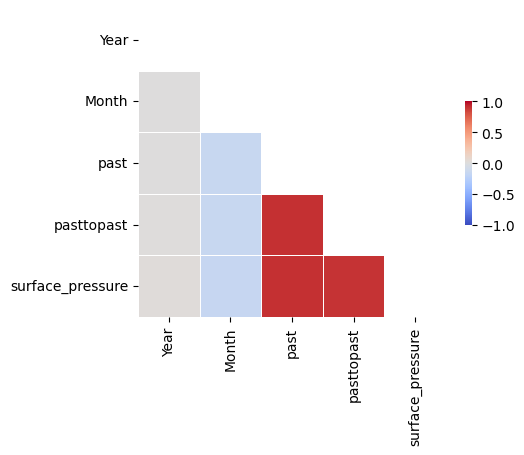

In [8]:
f, ax = plt.subplots(figsize=(5, 4)) 
heatmap = sns.heatmap(corr_matrix, mask = mask,square = True,linewidths = .5, cmap = 'coolwarm', cbar_kws = {'shrink': .4, 'ticks' : [-1, -.5, 0, 0.5, 1]},vmin = -1, vmax = 1,annot = True,annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [9]:
sp=sp.drop(['Year','Month'],axis=1)

In [10]:
sp.shape

(360, 3)

In [11]:
X=sp.drop('surface_pressure',axis=1)
y=sp.surface_pressure

In [12]:
X

,past,pasttopast
0,100.340625,100.470000
1,100.416875,100.315000
2,100.152500,100.045625
3,99.939375,100.041875
4,99.670625,99.658750
...,...,...
355,99.801875,99.768125
356,99.969375,99.927500
357,100.181250,99.973125
358,100.311875,100.111250


In [13]:
y

0      100.491250
1      100.316250
2      100.245625
3       99.900000
4       99.688750
          ...    
355     99.875000
356    100.030000
357    100.178125
358    100.247500
359    100.411875
Name: surface_pressure, Length: 360, dtype: float64

In [14]:
X.shape

(360, 2)

In [15]:
y.shape

(360,)

In [16]:
# Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshaping data for LSTM/GRU/RNN (samples, timesteps, features)
X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], X_scaled.shape[1], 1))

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

### GRU

In [17]:
def create_gru_model(units=64):
    model = Sequential()
    model.add(GRU(units=units, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer=Adam(), loss='mse')
    return model

In [18]:
gru_model = KerasRegressor(build_fn=create_gru_model, verbose=0)

C:\Users\C KIRANMAYI\AppData\Local\Temp\ipykernel_13912\2098133132.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  gru_model = KerasRegressor(build_fn=create_gru_model, verbose=0)


In [19]:
# Define the hyperparameter grid
gru_param_grid = {
    'units': [32, 64, 128],
    'batch_size': [16, 32],
    'epochs': [50, 100]
}

In [20]:
gru_grid = GridSearchCV(estimator=gru_model, param_grid=gru_param_grid, cv=3, scoring='neg_mean_squared_error')

In [21]:
gru_grid_result = gru_grid.fit(X_train, y_train)

In [22]:
print(f"Best GRU params: {gru_grid_result.best_params_}")
print(f"Best GRU score: {gru_grid_result.best_score_}")

Best GRU params: {'batch_size': 16, 'epochs': 100, 'units': 128}
Best GRU score: -0.12503792520602033


### LSTM

In [23]:
def create_lstm_model(units=64):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer=Adam(), loss='mse')
    return model

In [24]:
lstm_model = KerasRegressor(build_fn=create_lstm_model, verbose=0)

C:\Users\C KIRANMAYI\AppData\Local\Temp\ipykernel_13912\1916978622.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  lstm_model = KerasRegressor(build_fn=create_lstm_model, verbose=0)


In [25]:
# Define the hyperparameter grid
lstm_param_grid = {
    'units': [32, 64, 128],
    'batch_size': [16, 32],
    'epochs': [50, 100]
}

In [26]:
lstm_grid = GridSearchCV(estimator=lstm_model, param_grid=lstm_param_grid, cv=3, scoring='neg_mean_squared_error')

In [27]:
lstm_grid_result = lstm_grid.fit(X_train, y_train)

In [28]:
print(f"Best LSTM params: {lstm_grid_result.best_params_}")
print(f"Best LSTM score: {lstm_grid_result.best_score_}")

Best LSTM params: {'batch_size': 16, 'epochs': 100, 'units': 128}
Best LSTM score: -2.0744476257510627


### RNN

In [29]:
def create_rnn_model(units=64):
    model = Sequential()
    model.add(SimpleRNN(units=units, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer=Adam(), loss='mse')
    return model

In [30]:
rnn_model = KerasRegressor(build_fn=create_rnn_model, verbose=0)

C:\Users\C KIRANMAYI\AppData\Local\Temp\ipykernel_13912\361697586.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  rnn_model = KerasRegressor(build_fn=create_rnn_model, verbose=0)


In [31]:
rnn_param_grid = {
    'units': [32, 64, 128],
    'batch_size': [16, 32],
    'epochs': [50, 100]
}

In [32]:
rnn_grid = GridSearchCV(estimator=rnn_model, param_grid=rnn_param_grid, cv=3, scoring='neg_mean_squared_error')

In [33]:
rnn_grid_result = rnn_grid.fit(X_train, y_train)

In [34]:
print(f"Best SimpleRNN params: {rnn_grid_result.best_params_}")
print(f"Best SimpleRNN score: {rnn_grid_result.best_score_}")

Best SimpleRNN params: {'batch_size': 16, 'epochs': 100, 'units': 128}
Best SimpleRNN score: -0.4586403211087589


In [35]:
# Evaluating GRU model on test data
best_gru_model = gru_grid_result.best_estimator_
y_pred_gru = best_gru_model.predict(X_test)
mse_gru = mean_squared_error(y_test, y_pred_gru)


print(f"GRU Model - MSE: {mse_gru}")

# Evaluating LSTM model on test data
best_lstm_model = lstm_grid_result.best_estimator_
y_pred_lstm = best_lstm_model.predict(X_test)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)


print(f"LSTM Model - MSE: {mse_lstm}")

# Evaluating SimpleRNN model on test data
best_rnn_model = rnn_grid_result.best_estimator_
y_pred_rnn = best_rnn_model.predict(X_test)
mse_rnn = mean_squared_error(y_test, y_pred_rnn)


print(f"SimpleRNN Model - MSE: {mse_rnn}")


GRU Model - MSE: 0.04414381120133768
LSTM Model - MSE: 1.6103263772559702
SimpleRNN Model - MSE: 0.044734485213215214


## GRU is sutaible for SURFACE PRESSURE with least MSE

In [36]:
sp2021=pd.read_csv("C:\\Users\\C KIRANMAYI\\Downloads\\2020Yield\\Phase 1\\csv\\2020\\surface_pressure.csv")

In [37]:
sp2021=sp2021.drop(['Year','Month'],axis=1)

In [38]:
sp2021

,past,pasttopast
0,100.586875,100.344375
1,100.457500,100.430000
2,100.291250,100.202500
3,100.051250,100.017500
4,99.841250,99.823125
5,99.728750,99.751250
6,99.795000,99.757500
7,99.875000,99.801875
8,100.030000,99.969375
9,100.178125,100.181250


In [39]:
sp2020_pred=[]

In [40]:
sp2021_scaled = scaler.transform(sp2021)

# Reshape for prediction
sp2021_scaled = np.reshape(sp2021_scaled, (sp2021_scaled.shape[0], sp2021_scaled.shape[1], 1))

In [41]:
best_model = gru_grid_result.best_estimator_
sp2020_pred=best_model.predict(sp2021_scaled)

In [42]:
sp2020_pred

array([100.12726 , 100.12412 , 100.11611 , 100.09005 , 100.032845,
        99.97519 , 100.01143 , 100.04476 , 100.085976, 100.10721 ,
       100.11356 , 100.122505], dtype=float32)

In [43]:
sp_data=pd.DataFrame(data=sp2020_pred)
sp_data

,0
0,100.127258
1,100.124123
2,100.116112
3,100.090050
4,100.032845
5,99.975189
6,100.011429
7,100.044762
8,100.085976
9,100.107208


In [44]:
#Exporting the predictions of 2021 into csv file
sp_data.to_csv("C:\\Users\\C KIRANMAYI\\Downloads\\2020Yield\\Phase 1\\csv\\2020\\surface_pressure1.csv")
